___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
import numpy as np
import random as rd


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

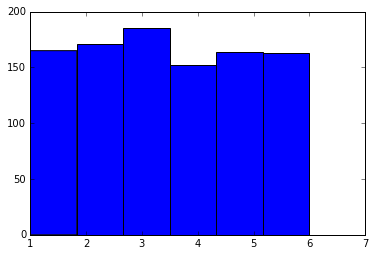

,Face 1,Face 2,Face 3,Face 4,Face 5,Face 6
Quantidade obtida,165,171,185,152,164,163


In [121]:
#Item -a-

dice= pd.DataFrame(index=['Quantidade obtida'],
    columns=['Face 1', 'Face 2', 'Face 3', 'Face 4', 'Face 5','Face 6'])
dice= dice.fillna(0)


i=0
results=[]
while(i != 1000):
    
    val= rd.randint(1, 6)
    results.append(val)
    val="Face "+str(val)
    dice[val]+=1
    i+= 1
    
plt.hist(results, bins= 6)
plt.show()


dice

#Item -b-

A probabilidade de se obter um certo resultado não significa que a incidência desse resultado será idêntica à da probabilidade. O que ela indica é uma tendência do resultado de se aproximar à essa porcentagem de resultados 

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

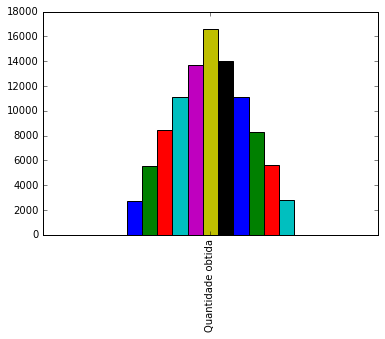

16625
Total de 7s: 16625
Porcentual de 7s: 16.625%
A probabilidade de se obter 7 é 1/6


,Resultado 2,Resultado 3,Resultado 4,Resultado 5,Resultado 6,Resultado 7,Resultado 8,Resultado 9,Resultado 10,Resultado 11,Resultado 12
Quantidade obtida,2717,5562,8425,11076,13721,16625,14026,11077,8305,5654,2812


In [114]:
#Item -a-

dice= pd.DataFrame(index=['Quantidade obtida'],
    columns=['Resultado 2', 'Resultado 3', 'Resultado 4', 'Resultado 5', 'Resultado 6', 'Resultado 7', 'Resultado 8', 'Resultado 9', 'Resultado 10', 'Resultado 11', 'Resultado 12'])

dice= dice.fillna(0)


i=0
while(i != 100000):
    
    val= rd.randint(1, 6)
    val+= rd.randint(1, 6)
    val="Resultado "+str(val)
    dice[val]+=1
    i+= 1
    
dice.plot.bar(legend=False)
plt.show()

temp=dice.iloc[0][5]
print(temp)
print( "Total de 7s: "+str(temp))
print( "Porcentual de 7s: "+str(100*temp/100000)+"%")
print("A probabilidade de se obter 7 é 1/6")
dice

#Item -a-

A probabilidade será de 1/6, todo possível valor "a" do dado tem um complementar válido "b" tal que b=(7-a)
Como esse complementar "b" é um valor único dentre de 6 valores, a chance será também 1/6

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [53]:
dice= pd.DataFrame(index=['Quantidade obtida'],
    columns=['Face 1', 'Face 2', 'Face 3', 'Face 4', 'Face 5','Face 6'])

i=0
victory= 0
while(i!=10000):

    prized_door= rd.randint(1, 3)
    chosen_door= rd.randint(1, 3)
    
    closed_doors= [1, 2, 3]
    closed_doors.remove(prized_door)
    if chosen_door != prized_door:
        closed_doors.remove(chosen_door)
    opened_door= rd.choice(closed_doors)
    
    chosen_door= 6-(chosen_door+opened_door)
    
    if chosen_door == prized_door:
        victory+= 1
        
    i+= 1
    

print( "Total de vitórias: "+str(victory))
print( "Porcentual de vitórias:"+str(victory/100))

Total de vitórias: 6650
Porcentual de vitórias:66.5
